In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h2>Máscara</h2>
<p>Realizar el cálculo de una máscara para seleccionar aquellos ND de interés en la imagen seleccionada.</p>

In [2]:
def mascara(img,mask):
    resimg=np.zeros(img.shape,dtype=int)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            resimg[i][j]=img[i][j]*mask[i][j]
    return resimg

In [3]:
img=np.array([
    [1,1,1,3],
    [2,1,1,1],
    [3,2,1,1],
    [1,1,1,2]
])
mask=np.array([
    [1,0,1,1],
    [1,0,1,1],
    [1,0,1,0],
    [1,0,1,0]
])
res=mascara(img,mask)
print(res)

[[1 0 1 3]
 [2 0 1 1]
 [3 0 1 0]
 [1 0 1 0]]


<p>A continuación se empleará la función máscara del ejercicio anterior para obtener ciertos detalles de la imagen seleccionada y descartar otros.</p>

In [4]:
def calculaMask(img,NDmin,NDmax):
    mask=np.zeros((img.shape[0],img.shape[1]),dtype=np.int16)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j]>NDmin and img[i][j]<NDmax:
                mask[i][j]=1
            else:
                mask[i][j]=0
    return mask

In [5]:
img=cv2.imread('../imgpack/Filomena.jpg',cv2.IMREAD_GRAYSCALE)
mask_luces=calculaMask(img,225,255)
msk_img_luces=mascara(img,mask_luces)
cv2.imwrite("modificadas/Filomena_MascaraLuces.png",msk_img_luces)

True

In [6]:
mask_nubes=calculaMask(img,100,170)
msk_img_nubes=mascara(img,mask_nubes)
cv2.imwrite("modificadas/Filomena_MascaraNubes.png",msk_img_nubes)

True

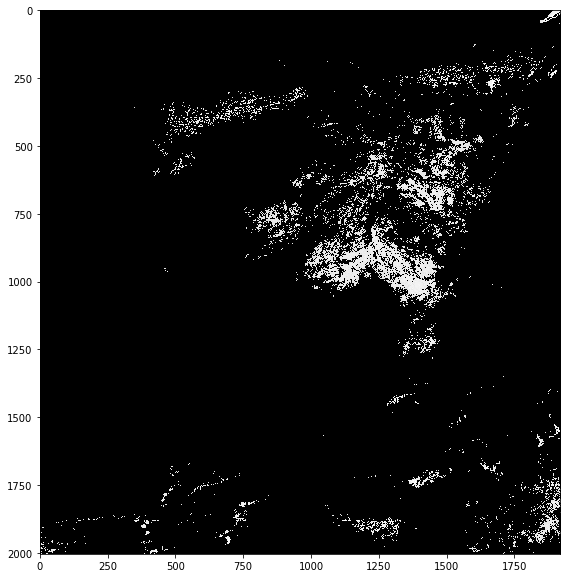

In [9]:
plt.figure(1)
plt.imshow(msk_img_luces,cmap='gray')
plt.rcParams['figure.figsize']=[10,10]

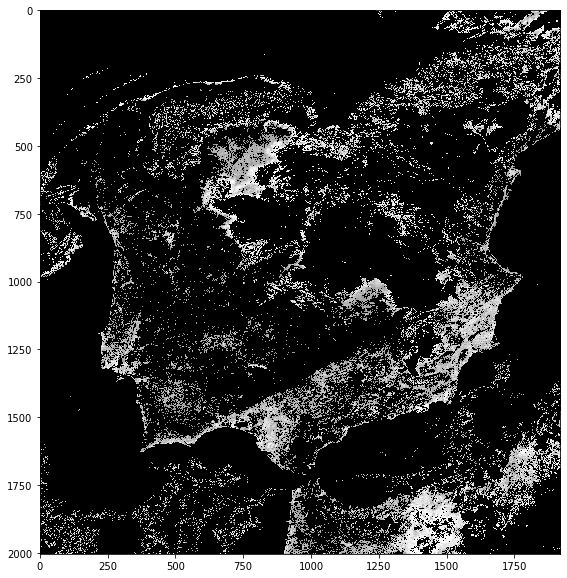

In [8]:
plt.figure(2)
plt.imshow(msk_img_nubes,cmap='gray')
plt.rcParams['figure.figsize']=[10,10]